In [1]:
import numpy as np 
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pomegranate import *

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name 'BayesianNetwork' from 'pomegranate' (C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pomegranate\__init__.py)

In [21]:
# numpy check version
print(pg.__version__)

1.0.3


In [3]:
train = pd.read_csv('dataset.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Aktivitas Wisata,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,1,0,0,1
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,"Makan Bersama, Mengambil Foto, Beribadah, Berb...",1,0,0,0,1,1,0,0,1
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,"Makan Bersama, Belajar, Mengambil Foto, Berbel...",1,0,1,0,1,0,0,0,1
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,"Makan Bersama, Mengambil Foto, Berbelanja",1,0,0,0,1,0,0,0,1
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,"Makan, Berolahraga, Belajar, Mengambil Foto, M...",1,1,1,0,1,0,0,1,1


In [4]:
test = pd.read_csv('test.csv')

test['Passenger ID'] = test.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
test['Passenger ID'] = range(1, len(test) + 1)

cols = list(test.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
test = test[cols]

test.set_index('Passenger ID', inplace=True)

# Tampilkan testFrame
test

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Aktivitas Wisata,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,1,0,0,1


In [5]:
train.describe()

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,...,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,0.893333,0.836296,0.754815,0.860000,0.408148,0.866667,0.585185,0.768889,0.562222,0.585926,...,0.520000,0.497037,0.257037,0.417037,0.060000,0.684444,0.178519,0.027407,0.318519,0.378519
std,0.308803,0.370144,0.430356,0.347116,0.491673,0.340061,0.492873,0.421700,0.496297,0.492744,...,0.499785,0.500177,0.437162,0.493252,0.237575,0.464909,0.383091,0.163328,0.466074,0.485198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
drop_list = ['Aktivitas Wisata']

train = train.drop(columns=drop_list)

test = test.drop(columns=drop_list)



In [7]:
test

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,0,0,1,1,0,0,1


In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1 to 1350
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nama Wisata                  1350 non-null   object
 1   Escape                       1350 non-null   int64 
 2   Relaxation                   1350 non-null   int64 
 3   Play                         1350 non-null   int64 
 4   Strenghthening family bonds  1350 non-null   int64 
 5   Prestige                     1350 non-null   int64 
 6   Social Interaction           1350 non-null   int64 
 7   Romance                      1350 non-null   int64 
 8   Educational Opportunity      1350 non-null   int64 
 9   Self-fulfilment              1350 non-null   int64 
 10  Wish-fulfiment               1350 non-null   int64 
 11  Lingkungan                   1350 non-null   int64 
 12  Infrastruktur                1350 non-null   int64 
 13  Fasilitas                    1350

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Escape                       1 non-null      int64
 1   Relaxation                   1 non-null      int64
 2   Play                         1 non-null      int64
 3   Strenghthening family bonds  1 non-null      int64
 4   Prestige                     1 non-null      int64
 5   Social Interaction           1 non-null      int64
 6   Romance                      1 non-null      int64
 7   Educational Opportunity      1 non-null      int64
 8   Self-fulfilment              1 non-null      int64
 9   Wish-fulfiment               1 non-null      int64
 10  Lingkungan                   1 non-null      int64
 11  Infrastruktur                1 non-null      int64
 12  Fasilitas                    1 non-null      int64
 13  Akomodasi                    1 non-null      int64
 14

In [10]:
# Data preparing
dfhot_train, dfnum_train = bn.df2onehot(train)

dfnum_test = test


[df2onehot] >Auto detecting dtypes.


100%|██████████| 24/24 [00:00<00:00, 168.07it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 261.08it/s]

[df2onehot] >Total onehot features: 73


In [11]:
dfnum_train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
0,27,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,0,0,1
1,27,1,1,1,1,1,1,1,0,0,...,1,1,0,0,0,1,1,0,0,1
2,27,1,0,1,1,1,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
3,27,1,1,1,1,0,0,1,1,1,...,1,1,0,0,0,1,0,0,0,1
4,27,1,1,1,1,0,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1,1,0,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,0,0,0
1346,1,1,1,1,1,0,1,1,1,1,...,0,0,1,1,0,1,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,0,1,0,0,1,1
1348,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,0,1,0,0,1,1


In [12]:
dfnum_test

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,0,0,1,1,0,0,1


In [13]:
dfnum_target = dfnum_train.pop('Nama Wisata')
dfnum_target

0       27
1       27
2       27
3       27
4       27
        ..
1345     1
1346     1
1347     1
1348     1
1349     1
Name: Nama Wisata, Length: 1350, dtype: int32

In [14]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')
dfnum

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Nama Wisata
1118,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,1,5
642,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,15
687,1,1,0,1,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,14
322,1,0,1,1,1,0,1,0,1,1,...,1,0,0,0,1,0,0,1,1,21
326,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,0,1,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,12
835,1,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,11
1216,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,3
559,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,1,17


In [15]:
dfnum

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Nama Wisata
1118,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,1,5
642,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,15
687,1,1,0,1,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,14
322,1,0,1,1,1,0,1,0,1,1,...,1,0,0,0,1,0,0,1,1,21
326,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,0,1,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,12
835,1,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,11
1216,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,3
559,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,1,17


In [16]:
edges = [
    ('Escape', 'Nama Wisata'),
    ('Relaxation', 'Nama Wisata'),
    ('Play', 'Nama Wisata'),
    ('Strenghthening family bonds', 'Nama Wisata'),
    ('Prestige', 'Nama Wisata'),
    ('Social Interaction', 'Nama Wisata'),
    ('Romance', 'Nama Wisata'),
    ('Educational Opportunity', 'Nama Wisata'),
    ('Self-fulfilment', 'Nama Wisata'),
    ('Wish-fulfiment', 'Nama Wisata'),
    ('Lingkungan', 'Nama Wisata'),
    ('Infrastruktur', 'Nama Wisata'),
    ('Fasilitas', 'Nama Wisata'),
    ('Akomodasi', 'Nama Wisata'),
    ('Nama Wisata', 'Makan Bersama'),
    ('Nama Wisata', 'Berolahraga'),
    ('Nama Wisata', 'Belajar'),
    ('Nama Wisata', 'Berinteraksi dengan satwa'),
    ('Nama Wisata', 'Mengambil Foto'),
    ('Nama Wisata', 'Beribadah'),
    ('Nama Wisata', 'Berkemah'),
    ('Nama Wisata', 'Melihat Pemandangan'),
    ('Nama Wisata', 'Berbelanja')
]

In [ ]:
# Membuat Bayesian Network
model = BayesianNetwork()

# Menambahkan node dan distribusi probabilitas
nodes = {}
for column in dfnum.columns:
    nodes[column] = DiscreteDistribution(dict(dfnum[column].value_counts(normalize=True)))

for node, distribution in nodes.items():
    model.add_node(node, distribution)

In [57]:
params_static = {
    'figsize': (15, 10),
    'width': 20,  # Menyesuaikan lebar panah
    'edge_alpha': 0.5,  # Menyesuaikan kejelasan panah
    'arrowstyle': '-|>',  # Gaya panah (ubah sesuai kebutuhan)
    'arrowsize': 20,  # Ukuran panah
    'minscale': 5,
    'maxscale': 15,
    'layout': 'spring_layout',
    'font_size': 14,
    'font_family': 'sans-serif',
    'alpha': 0.8,
    'node_shape': 'o',
    'font_color': '#000000',
    'facecolor': 'white',
    'visible': True
}

In [30]:
model = pg.BayesianNetwork()



AttributeError: module 'pomegranate' has no attribute 'BayesianNetwork'

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


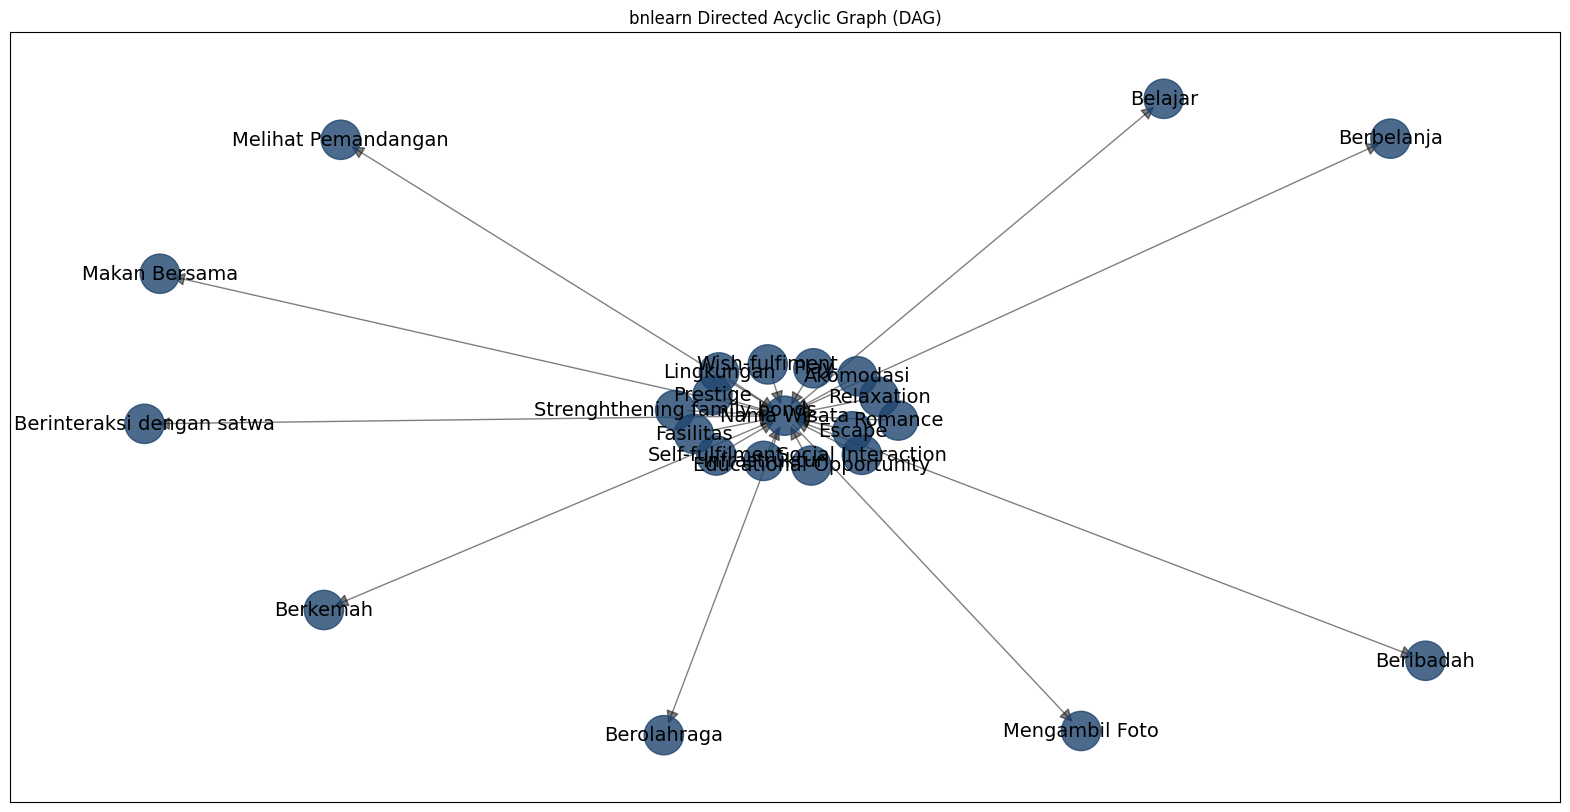

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Escape:
+-----------+----------+
| Escape(0) | 0.299038 |
+-----------+----------+
| Escape(1) | 0.700962 |
+-----------+----------+
[bnlearn] >CPD of Nama Wisata:
+-----------------------------+-----+--------------------------------+
| Akomodasi                   | ... | Akomodasi(1)                   |
+-----------------------------+-----+--------------------------------+
| Educational Opportunity     | ... | Educational Opportunity(1)     |
+-----------------------------+-----+--------------------------------+
| Escape                      | ... | Escape(1)                      |
+-----------------------------+-----+--------------------------------+
| Fasilitas                   | ... | Fasilitas(1)                   |
+-----------------------------+-----+--------------------------------+
| Infrastruktur               | ... | Infrastruktur(1)               |
+-----------------------------+-----+-----

In [59]:
# model 1

# Structure learning yang mana seperti berikuut semua variabel / dfnum_train mengarah ke dfnum_target
DAG = bn.make_DAG(edges, verbose=0)


bn.print_CPD(DAG)


# Plot
G = bn.plot(DAG, interactive=False, params_static=params_static)


# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum, verbose=3);




In [60]:
model['adjmat']

# print
print(model['adjmat'])

target                       Escape  Nama Wisata  Relaxation   Play  \
source                                                                
Escape                        False         True       False  False   
Nama Wisata                   False        False       False  False   
Relaxation                    False         True       False  False   
Play                          False         True       False  False   
Strenghthening family bonds   False         True       False  False   
Prestige                      False         True       False  False   
Social Interaction            False         True       False  False   
Romance                       False         True       False  False   
Educational Opportunity       False         True       False  False   
Self-fulfilment               False         True       False  False   
Wish-fulfiment                False         True       False  False   
Lingkungan                    False         True       False  False   
Infras

In [61]:
vector = bn.adjmat2vec(DAG['adjmat'])

print(vector)

                         source                     target  weight
0                        Escape                Nama Wisata    True
1                   Nama Wisata              Makan Bersama    True
2                   Nama Wisata                Berolahraga    True
3                   Nama Wisata                    Belajar    True
4                   Nama Wisata  Berinteraksi dengan satwa    True
5                   Nama Wisata             Mengambil Foto    True
6                   Nama Wisata                  Beribadah    True
7                   Nama Wisata                   Berkemah    True
8                   Nama Wisata        Melihat Pemandangan    True
9                   Nama Wisata                 Berbelanja    True
10                   Relaxation                Nama Wisata    True
11                         Play                Nama Wisata    True
12  Strenghthening family bonds                Nama Wisata    True
13                     Prestige                Nama Wisata    

In [62]:
# Print model
# bn.print_CPD(model)

In [63]:
# buat evidence seperti ini 
# Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,Lingkungan,Infrastruktur,Fasilitas,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
# 1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,1

evidence = {
    'Escape': 1,
    'Relaxation': 1,
    'Play': 1,
    'Strenghthening family bonds': 1,
    'Prestige': 0,
    'Social Interaction': 1,
    'Romance': 0,
    'Educational Opportunity': 0,
    'Self-fulfilment': 1,
    'Wish-fulfiment': 0,
    'Lingkungan': 1,
    'Infrastruktur': 0,
    'Fasilitas': 1,
    'Akomodasi': 1,
    'Makan Bersama': 1,
    'Berolahraga': 1,
    'Belajar': 0,
    'Berinteraksi dengan satwa': 0,
    'Mengambil Foto': 1,
    'Beribadah': 1,
    'Berkemah': 0,
    'Melihat Pemandangan': 0,
    'Berbelanja': 1
}


In [64]:
query = bn.inference.fit(model, variables=['Nama Wisata'], evidence=evidence, verbose=3)
query.df



[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------+-------------+
|    |   Nama Wisata |           p |
+====+===============+=============+
|  0 |             1 | 0.00145137  |
+----+---------------+-------------+
|  1 |             2 | 0.0021984   |
+----+---------------+-------------+
|  2 |             3 | 0.000495514 |
+----+---------------+-------------+
|  3 |             4 | 0.00137481  |
+----+---------------+-------------+
|  4 |             5 | 0.00131598  |
+----+---------------+-------------+
|  5 |             6 | 0.000645147 |
+----+---------------+-------------+
|  6 |             7 | 0.000620736 |
+----+---------------+-------------+
|  7 |             8 | 0.000385872 |
+----+---------------+-------------+
|  8 |             9 | 0.000590286 |
+----+---------------+-------------+
|  9 |            10 | 0.00171771  |
+----+---------------+-------------+
| 10 |       

,Nama Wisata,p
0,1,0.001451
1,2,0.002198
2,3,0.000496
3,4,0.001375
4,5,0.001316
5,6,0.000645
6,7,0.000621
7,8,0.000386
8,9,0.000590
9,10,0.001718


In [65]:
# change Nama Wisata dari angka ke nama

query.df['Nama Wisata'] = {
    0: "Balai Pemuda Alun - Alun Surabaya",
    1: "Galaxy Mall Surabaya",
    2: "House of Sampoerna",
    3: "Jalan Tunjungan",
    4: "Jatim International Expo (JIE) Convention Exhibiton",
    5: "Kampung Lawas Maspati",
    6: "Kampung Pecinaan Kapasan Dalam",
    7: "Kebun Binatang Surabaya",
    8: "Kebun Raya Mangrove Gunung Anyar",
    9: "Kodam Street Food Surabaya",
    10: "Kuliner Pecinan Kembang Jepun",
    11: "Makam Sunan Ampel",
    12: "Masjid Cheng Ho",
    13: "Masjid Nasional Al Akbar",
    14: "Mirota Batik & Handicraft",
    15: "Monumen Tugu Pahlawan",
    16: "Monumen Kapal Selam",
    17: "Museum Pendidikan Surabaya",
    18: "Museum Surabaya Gedung Siola",
    19: "Pasar Genteng",
    20: "Pasar Pabean",
    21: "Pusat Olahraga KONI",
    22: "Stadion Gelora Bung Tomo",
    23: "Surabaya Convention Center",
    24: "Taman Bungkul",
    25: "Taman Suroboyo",
    26: "Tunjungan Plaza"
}

query.df = query.df.sort_values(by='p', ascending=False)
query.df

,Nama Wisata,p
20,Pasar Pabean,0.972601
26,Tunjungan Plaza,0.002257
1,Galaxy Mall Surabaya,0.002198
10,Kuliner Pecinan Kembang Jepun,0.002130
9,Kodam Street Food Surabaya,0.001718
19,Pasar Genteng,0.001521
0,Balai Pemuda Alun - Alun Surabaya,0.001451
3,Jalan Tunjungan,0.001375
22,Stadion Gelora Bung Tomo,0.001365
4,Jatim International Expo (JIE) Convention Exhi...,0.001316


In [77]:
y_pred = bn.predict(model, valid, "Nama Wisata", verbose=3)
print(y_pred)

<bound method BayesianNetwork.predict of <pgmpy.models.BayesianNetwork.BayesianNetwork object at 0x0000022BFA7C83D0>>


In [67]:
y_pred['Nama Wisata'] = valid['Nama Wisata'].values

TypeError: 'method' object does not support item assignment

In [78]:
# Get score of the model1
acc = accuracy_score(dfnum_test['Nama Wisata'], y_pred['Nama Wisata'])

KeyError: 'Nama Wisata'